In [4]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('mycar.csv')
df.tail()

,Speed,Stopping_dist
44,23,54
45,24,70
46,24,92
47,24,93
48,25,85


In [36]:
X = np.array(df['Speed'].values)
X = np.expand_dims(X,1)
Y = np.array(df['Stopping_dist'].values)

In [14]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [16]:
from sklearn.linear_model import LinearRegression

In [50]:
myModel = LinearRegression()
myModel.fit(X_train, Y_train)

LinearRegression()

In [51]:
y_pred = myModel.predict(X_test)
y_pred

array([31.65146102, -5.12945004, 72.51913998, 27.56469312, 11.21762154,
       27.56469312, 60.25883629, 31.65146102, 23.47792523, 31.65146102,
       43.91176471, 52.0853005 , 19.39115733, 35.73822891, 39.82499681])

In [41]:
from sklearn import metrics

In [52]:
MAE = metrics.mean_absolute_error(Y_test, y_pred)
MAE

12.04020671175194

In [53]:
MSE = metrics.mean_squared_error(Y_test, y_pred)
MSE

268.45917309009036

In [54]:
MAPE = metrics.mean_absolute_percentage_error(Y_test, y_pred)
MAPE

0.5217780686779689

In [55]:
R_2 = metrics.r2_score(Y_test, y_pred)
R_2

0.16087861267406167

In [56]:
yy_true = [2,3,-1,4]
yy_pred = [1,3,2,5]
MSE = metrics.mean_squared_error(yy_true, yy_pred)
MSE

2.75

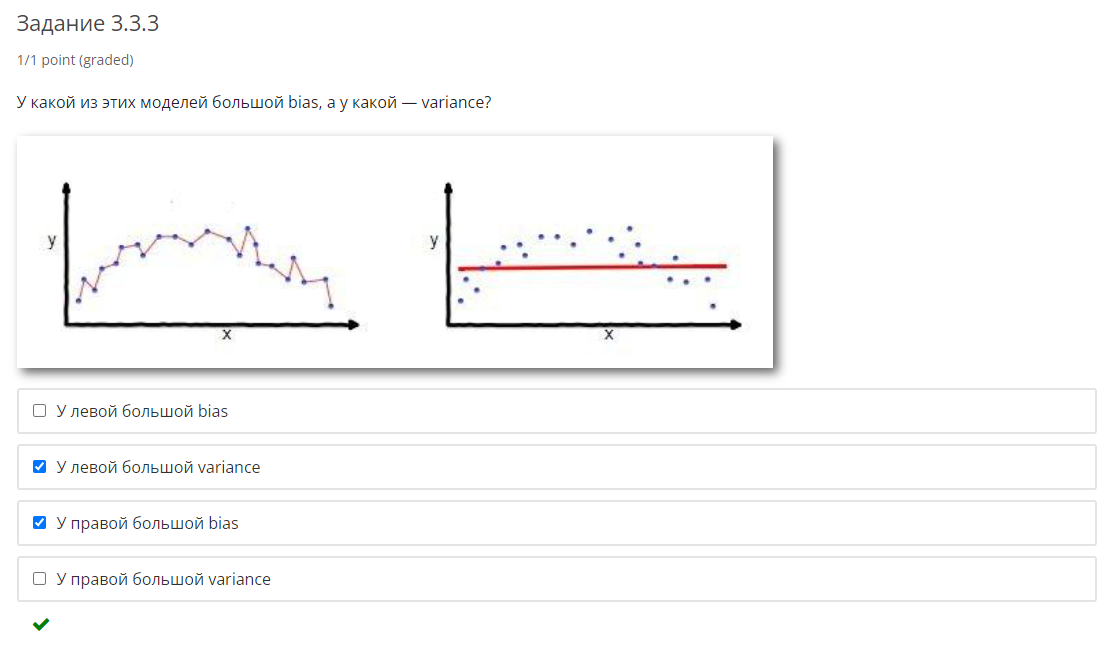

In [57]:
metrics.r2_score([2,3,-1,4],[1,3,2,5]) #y_true, y_pred

0.2142857142857143

In [59]:
metrics.r2_score([1,3,2,5],[2,3,-1,4]) #y-pred, y_true

-0.2571428571428571

# Задача про квартиры

In [188]:
data = pd.read_csv('data_flats2.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [172]:
# обязательно запрашиваем список переменных с их типами,
# заодно сможем посмотреть, сколько у нас пропусков:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

Что мы можем увидеть по нему? Что у нас есть 20 признаков. Один из них — id, не несет смысловой нагрузки. А один из признаков — наша независимая переменная, которую мы и будем предсказывать. Это цена квартиры (price_doc).

Мы точно можем видеть, что у нас есть пропуски, так как количество наблюдений разное у разных переменных и отличается для некоторых признаков от количества объектов.

In [173]:
# Также количество пропусков для каждого признака можно посмотреть следующим образом:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

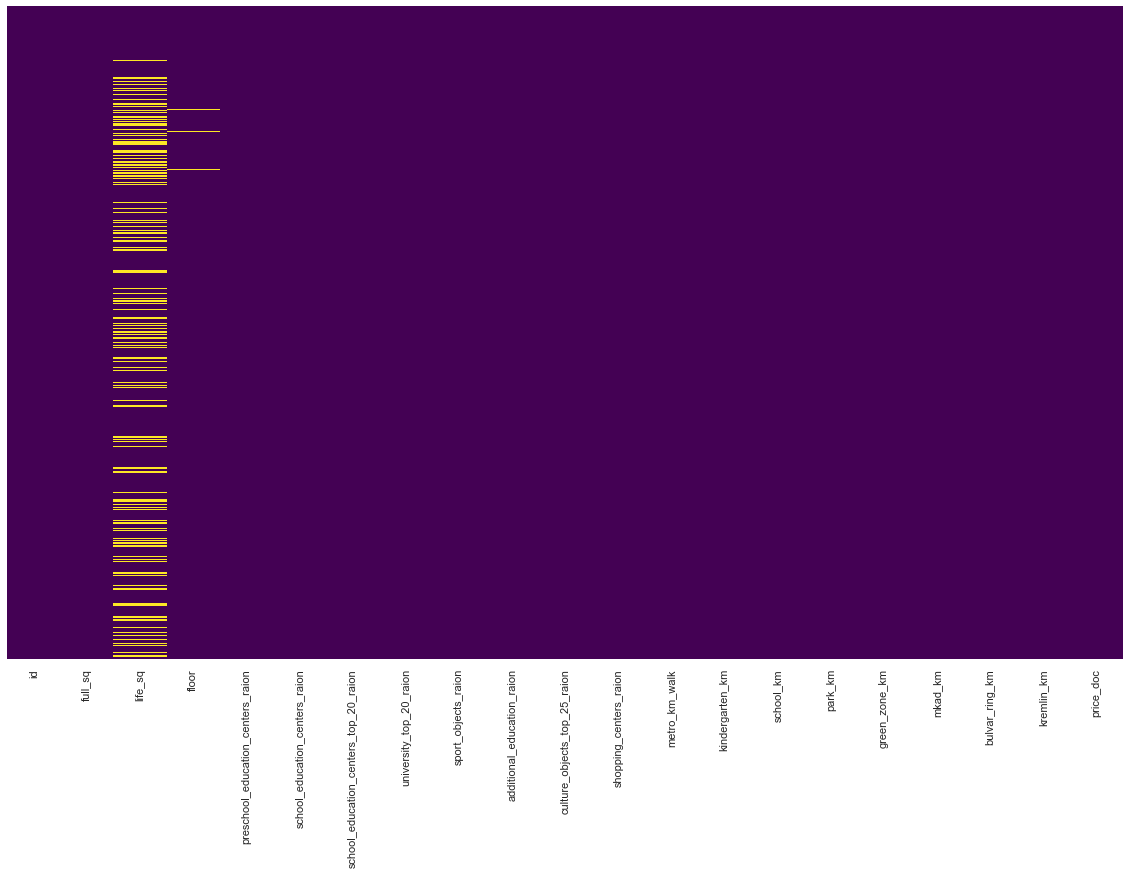

In [130]:
# Или можно оценить визуально количество пропусков и их распределение:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

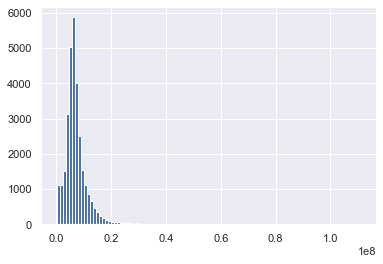

In [174]:
# Далее всегда есть смысл посмотреть на распределение нашей целевой переменной
# и понять, какие значения мы будем предсказывать:
data.price_doc.hist(bins=100)

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логарифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

In [189]:
data['price_doc'] = data['price_doc'].apply(lambda x: np.log(x+1))

<AxesSubplot:>

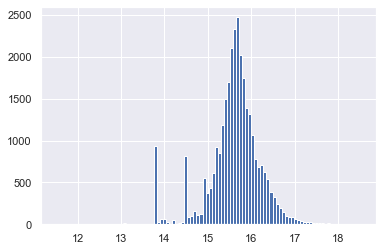

In [133]:
data.price_doc.hist(bins=100)

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

<AxesSubplot:>

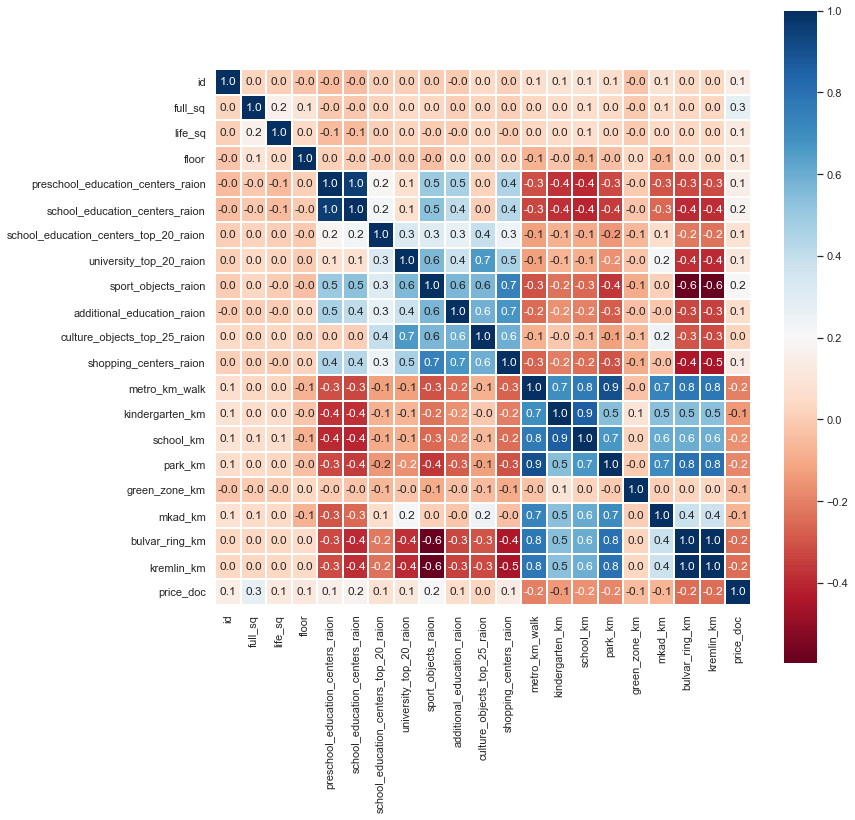

In [134]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Смотрим, у каких пар признаков сильная взаимосвязь:

#### Количество школ и количество детских садов.  
Довольно логично, так как в Москве детские сады обычно присоединены к школам. Оставляем школы, т.к. у этого признака больше взаимосвязь с целевой переменной.
#### Расстояние до школ и расстояние до детских садов.  
По сути, это естественным образом вытекает из предыдущего пункта. Оставляем расстояние до школ.
#### Расстояние до парка и до метро.  
Рассуждая аналогично предыдущим парам, оставляем расстояние до метро.
#### Расстояние до Кремля и до бульварного кольца.  
У них коэффициент корреляции равен 1, и их корреляция с целевой переменной одинаковая. Поэтому можем убрать любой признак. Убираем расстояние до Кремля.

Итак, нам надо убрать пять признаков (четыре из-за мультиколлинеарности и жилую площадь, так как там много пропусков), остальные оставляем. Теперь наши данные готовы к построению регрессионной модели.

In [190]:
data.drop(['id', 'life_sq', 'preschool_education_centers_raion',
#         'kindergarten_km', 'metro_km_walk', 'kremlin_km'], axis=1, inplace=True)
         'kindergarten_km', 'park_km', 'kremlin_km'], axis=1, inplace=True)

In [177]:
data.isnull().sum()

full_sq                                    0
floor                                    167
school_education_centers_raion             0
school_education_centers_top_20_raion      0
university_top_20_raion                    0
sport_objects_raion                        0
additional_education_raion                 0
culture_objects_top_25_raion               0
shopping_centers_raion                     0
school_km                                  0
park_km                                    0
green_zone_km                              0
mkad_km                                    0
bulvar_ring_km                             0
price_doc                                  0
dtype: int64

In [191]:
data.dropna(axis=0,inplace=True)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30302 entries, 0 to 30468
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   full_sq                                30302 non-null  int64  
 1   floor                                  30302 non-null  float64
 2   school_education_centers_raion         30302 non-null  int64  
 3   school_education_centers_top_20_raion  30302 non-null  int64  
 4   university_top_20_raion                30302 non-null  int64  
 5   sport_objects_raion                    30302 non-null  int64  
 6   additional_education_raion             30302 non-null  int64  
 7   culture_objects_top_25_raion           30302 non-null  int64  
 8   shopping_centers_raion                 30302 non-null  int64  
 9   school_km                              30302 non-null  float64
 10  park_km                                30302 non-null  float64
 11  gr

Задание 3.5.1  
0.0/2.0 points (graded)  
* Удалите строки, где есть хотя бы один пропуск.  
* Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77.  
* Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции RobustScaler() (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам).  
* Вычислите MSE.  
Не забудьте, что id не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора! Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти экспоненциальную функцию от y! Округлите ответ до целых.

In [192]:
y = data['price_doc'].values
X = data.drop(['price_doc'], axis=1)

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [194]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_train)
X_test = transformer.transform(X_test)
X_train = transformer.transform(X_train)
#X_train_RS = RobustScaler().fit_transform(X_train)
#X_test_RS = RobustScaler().fit_transform(X_test)

так делают, чтобы train и test были преобразованы одинаковым образом - в нашем случае, чтобы вычиталось одинаковая медиана и делилось на одинаковый IQR. Если так не делать, т.е. для test использовать медиану и IQR теста, то мы подгоним тестовые данные к тому виду, какой был у данных на обучении. Это плохо в двух моментах: 1) мы не сможем адекватно измерить обобщающую способность алгоритма; 2) мы не сможем использовать такое же преобразование на реальных данных (если модель будет используется в реальной жизни в каком-то приложении) - например, нам был дан один объект для предсказания. Это выборка из одного объекта - как посчитать у неё медиану? IQR? Ничего не остаётся, кроме как использовать медиану и IQR с train

In [195]:
# Импортируем необходимые библиотеки:
from sklearn.linear_model import LinearRegression # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [196]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#model.fit(X_train_RS, y_train)
#y_pred = model.predict(X_test_RS)

In [197]:
print(f'MSE: {metrics.mean_squared_error(np.exp(y_test)-1, np.exp(y_pred)-1):.0f}')

MSE: 16818684371715
